<a href="https://colab.research.google.com/github/VolkhinD/sentiment_analysis/blob/main/houses_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Basic Regression Model with Feature Selection Methods***

# Begginning 

In [1]:
import sys
!{sys.executable} -m pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error as MSLE, mean_absolute_error
from sklearn.compose import make_column_transformer, make_column_selector as selector
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

Download Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path_lin = '/content/drive/MyDrive/Data/houses/linear_data.csv'
path_tree = '/content/drive/MyDrive/Data/houses/tree_data.csv'

data_lin = pd.read_csv(path_lin, index_col=0)
y_lin_standart = data_lin.drop('36', axis=1)
data_lin = data_lin.drop('36', axis=1)
mean = 180775.4273916036
std = 79415.4391918568
y_lin = (y_lin_standart*std + mean).astype(int)

data_tree = pd.read_csv(path_tree, index_col=0)
y_tree = data_tree['36'].astype(int)
data_tree = data_tree.drop(['36'], axis=1)

print(data_lin.shape, data_tree.shape)

(1453, 244) (1453, 73)


# Feature Selection

## **Model-based selection** 



In [9]:
chosen_data = {}

In [10]:
xgboost = XGBRegressor(random_state=1).fit(data_tree, y_tree)
sfm_xgboost = SelectFromModel(xgboost, max_features=35).fit(data_tree, y_tree)
feature_names_tree = data_tree.columns
feat_xg = feature_names_tree[sfm_xgboost.get_support()]
chosen_data["XGBoost Selected"] = data_tree[feat_xg]
print(f"Features selected by SelectFromModel: {feat_xg}")

[21:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Features selected by SelectFromModel: Index(['2', '7', '8', '9', '12', '14', '17', '21', '22', '24', '25', '35',
       '69'],
      dtype='object')


In [23]:
# ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(data_lin, y_lin)
# importance = np.abs(ridge.coef_)
# feature_names = np.array(data_lin.columns)
# plt.bar(height=importance, x=feature_names)
# plt.title("Feature importances via coefficients")
# plt.show()


In [24]:
# threshold = np.sort(importance)[-150] + 0.01
# sfm = SelectFromModel(ridge, threshold=threshold).fit(data_lin, y_lin)
# feat_ridge = feature_names[sfm.get_support()]
# chosen_data['Ridge Linear Features'] = data_lin[feat_ridge]
# print(f"Features selected by SelectFromModel: {feat_ridge}")

In [25]:
# lasso = Lasso(alpha=2).fit(data_lin, y_lin)
# importance_l = np.abs(lasso.coef_)
# feature_names = np.array(data_lin.columns)
# plt.bar(height=importance_l, x=feature_names)
# plt.title("Feature importances via coefficients")
# plt.show()

In [ ]:
# sfm_lasso = SelectFromModel(lasso, threshold=threshold).fit(data_lin, y_lin)
# feat_lasso = feature_names[sfm_lasso.get_support()]
# chosen_data["Lasso Linear Features"] = data_lin[feat_lasso]
# print(f"Features selected by SelectFromModel: {feat_lasso}")

Features selected by SelectFromModel: ['0' '1' '2' '3' '4' '6' '8' '9' '11' '12' '14' '15' '17' '19' '21' '24'
 '41' '42' '45' '46' '49' '53' '54' '56' '59' '60' '61' '65' '67' '68'
 '69' '70' '71' '72' '73' '74' '77' '78' '79' '80' '81' '82' '83' '84'
 '86' '88' '89' '91' '93' '96' '98' '99' '103' '104' '105' '107' '108'
 '109' '111' '112' '113' '114' '115' '116' '117' '119' '120' '121' '122'
 '124' '125' '128' '129' '130' '131' '133' '137' '138' '139' '141' '144'
 '145' '148' '150' '152' '153' '154' '156' '157' '158' '159' '161' '162'
 '164' '167' '168' '169' '175' '178' '180' '181' '187' '190' '192' '193'
 '196' '197' '199' '207' '208' '209' '210' '211' '212' '213' '214' '220'
 '222' '223' '226' '228' '230' '231' '232' '233' '235' '236' '238' '239'
 '240' '242']


<BarContainer object of 73 artists>

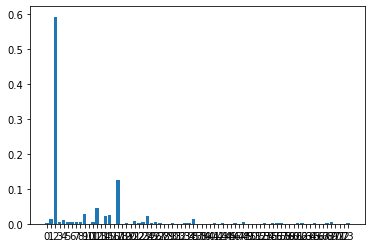

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=16)
forest.fit(data_tree, y_tree)
plt.bar(height=forest.feature_importances_, x=data_tree.columns)

In [ ]:
sfm_tree = SelectFromModel(forest, max_features=10).fit(data_tree, y_tree)
feature_names_tree = data_tree.columns
feat_tree = feature_names_tree[sfm_tree.get_support()]
chosen_data["Random Forest Tree Features"] = data_tree[feat_tree]
print(f"Features selected by SelectFromModel: {feat_tree}")

Features selected by SelectFromModel: Index(['2', '9', '12', '14', '15', '17', '24'], dtype='object')


Lasso and Ridge kept 99 features, Random Forst kept only 7

## **Iterative selection, with Sequential Feature Selection** 
\
There is one more implementation of this algorithm "backward" but it require more that 3 hours to complete.  


In [ ]:
%%time
sfs_forward_ridge = SequentialFeatureSelector(ridge, n_features_to_select=100, direction="forward").fit(data_lin, y_lin)
sfs_forward_tree = SequentialFeatureSelector(AdaBoostRegressor(), n_features_to_select=30, direction="forward").fit(data_tree, y_tree)


CPU times: user 21min 34s, sys: 14min 42s, total: 36min 17s
Wall time: 20min 40s


In [ ]:
%%capture
sfs_forward_xgb = SequentialFeatureSelector(XGBRegressor(random_state=1), n_features_to_select=30, direction="forward").fit(data_tree, y_tree)

In [ ]:
%%capture
sfs_backward_xgb = SequentialFeatureSelector(XGBRegressor(random_state=1),
                                             n_features_to_select=30, direction="backward").fit(data_tree, y_tree)

In [ ]:
feat_sfs_forward_ridge = feature_names[sfs_forward_ridge.get_support()]
feat_sfs_forward_tree = feature_names_tree[sfs_forward_tree.get_support()]

feat_sfs_forward_xgb = feature_names_tree[sfs_forward_tree.get_support()]
feat_sfs_backward_xgb = feature_names_tree[sfs_forward_tree.get_support()]

In [ ]:
path = '/content/drive/MyDrive/Data/houses/'
data_lin[feat_sfs_forward_ridge].to_csv(path + 'sfs_forward_linear.csv')
data_tree[feat_sfs_forward_tree].to_csv(path + 'sfs_forward_tree.csv')

data_tree[feat_sfs_forward_xgb].to_csv(path + 'sfs_forward_xgb.csv')
data_tree[feat_sfs_backward_xgb].to_csv(path + 'sfs_backward_xgb.csv')


In [ ]:
chosen_data["SFS forward Linear"] = pd.read_csv(path + 'sfs_forward_linear.csv')
chosen_data["SFS forward Tree"] = pd.read_csv(path + 'sfs_forward_tree.csv')

chosen_data["SFS forward XGB"] = pd.read_csv(path + 'sfs_forward_xgb.csv')
chosen_data["SFS backward XGB"] = pd.read_csv(path + 'sfs_backward_xgb.csv')


## **Iterative selection, Recursive Feature Elimination, RFE**


In [ ]:
%%time
selector = RFE(RandomForestRegressor(n_estimators=100, random_state=32), n_features_to_select=30).fit(data_tree, y_tree)
data_rfe_forest = pd.DataFrame(selector.transform(data_tree))
chosen_data["RFE Random Forest Tree"] = data_rfe_forest


selector2 = RFE(ridge, n_features_to_select=100).fit(data_lin, y_lin)
data_rfe_lin = pd.DataFrame(selector2.transform(data_lin))
chosen_data["RFE Linear Regression"] = data_rfe_lin

selector3 = RFE(XGBRegressor(random_state=1),n_features_to_select=30).fit(data_tree, y_tree)
data_rfe_xgb = pd.DataFrame(selector3.transform(data_tree))
chosen_data["RFE XGBoost"] = data_rfe_xgb


# Models with new Data

In [ ]:
scores = {'neg_mean_absolute_error': []}
index = []

In [ ]:
for name, data in chosen_data.items():
  if 'Linear' in name:
    result = cross_val_score(Lasso(), X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + Lasso']
    scores['neg_mean_absolute_error'].append(result.mean())
    result = cross_val_score(RidgeCV(alphas=np.logspace(-6, 6, num=5)), X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + Ridge']
    scores['neg_mean_absolute_error'].append(result.mean())
    result = cross_val_score(XGBRegressor(random_state=1), X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + XGBRegressor']
    scores['neg_mean_absolute_error'].append(result.mean())
    
  else:
    result = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=1), X=data, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + Random Forest']
    scores['neg_mean_absolute_error'].append(result.mean())
    result = cross_val_score(XGBRegressor(random_state=1), X=data, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + XGBRegressor']
    scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(RidgeCV(alphas=np.logspace(-6, 6, num=5)), X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + Ridge']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(Lasso(), X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
index += [name + ' + Lasso']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=1), X=data_tree, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + Random Forest']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(XGBRegressor(random_state=1), X=data_tree, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor']
scores['neg_mean_absolute_error'].append(result.mean())


In [ ]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,neg_mean_absolute_error
SFS forward Linear + Lasso,-16414.142146
SFS forward Linear + Ridge,-16372.360677
SFS forward Linear + XGBRegressor,-15466.751944
SFS forward Tree + Random Forest,-17119.008016
SFS forward Tree + XGBRegressor,-16030.969537
RFE Random Forest Tree + Random Forest,-16530.986324
RFE Random Forest Tree + XGBRegressor,-15723.656655
RFE Linear Regression + Lasso,-17421.441605
RFE Linear Regression + Ridge,-17335.920363
RFE Linear Regression + XGBRegressor,-15843.621777


The best estimator is XGBoost 

# PCA + Models

In [ ]:
scores = {'neg_mean_absolute_error': []}
index = []
n_comp = [50, 75, 100, 125, 150]
for n in n_comp:
  pipe = make_pipeline(PCA(n_components=n), XGBRegressor(random_state=1))
  result = cross_val_score(pipe, X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
  index += [f'PCA with {n} components + XGBRegressor Linear ' + name]
  scores['neg_mean_absolute_error'].append(result.mean())


In [ ]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,neg_mean_absolute_error
PCA with 50 components + XGBRegressor Linear Random Forest Tree Features,-16177.632845
PCA with 75 components + XGBRegressor Linear Random Forest Tree Features,-16041.683604
PCA with 100 components + XGBRegressor Linear Random Forest Tree Features,-16047.096073
PCA with 125 components + XGBRegressor Linear Random Forest Tree Features,-15953.465203
PCA with 150 components + XGBRegressor Linear Random Forest Tree Features,-16090.970181


In [ ]:
scores = {'neg_mean_absolute_error': []}
index = []
for name, data in chosen_data.items():
    result = cross_val_score(XGBRegressor(random_state=1), X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + XGBRegressor']
    scores['neg_mean_absolute_error'].append(result.mean())

result = cross_val_score(XGBRegressor(random_state=1), X=data_tree, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Tree']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(XGBRegressor(random_state=1), X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Linear']
scores['neg_mean_absolute_error'].append(result.mean())


In [ ]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,neg_mean_absolute_error
SFS forward Linear + XGBRegressor,-15466.751944
SFS forward Tree + XGBRegressor,-16030.973899
RFE Random Forest Tree + XGBRegressor,-15723.660588
RFE Linear Regression + XGBRegressor,-15843.621777
Ridge Linear Features + XGBRegressor,-15642.870394
Lasso Linear Features + XGBRegressor,-15481.976884
Random Forest Tree Features + XGBRegressor,-19465.371437
Full Data + XGBRegressor Tree,-15568.732597
Full Data + XGBRegressor Linear,-15380.487256


# Grid Search for Best Model

In [ ]:
%%time
gsc = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                        "random_satate": [1, 2, 3, 4, 5]},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc.fit(data_lin, y_lin)

[01:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 42.6 s, sys: 2.61 s, total: 45.2 s
Wall time: 31min 29s


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': (0.05, 0.1, 0.15),
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7],
                         'random_satate': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = XGBRegressor(colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=4,
             min_child_weight=3, random_satate=1)
scores = {'neg_mean_absolute_error': []}
index = []
for name, data in chosen_data.items():
    result = cross_val_score(best_model, X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + XGBRegressor']
    scores['neg_mean_absolute_error'].append(result.mean())

result = cross_val_score(best_model, X=data_tree, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Tree']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(XGBRegressor(random_state=1), X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Linear']
scores['neg_mean_absolute_error'].append(result.mean())


In [ ]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,neg_mean_absolute_error
SFS forward Linear + XGBRegressor,-15643.563376
SFS forward Tree + XGBRegressor,-15829.717361
RFE Random Forest Tree + XGBRegressor,-15356.394714
RFE Linear Regression + XGBRegressor,-15632.976052
Ridge Linear Features + XGBRegressor,-15547.997645
Lasso Linear Features + XGBRegressor,-15314.350169
Random Forest Tree Features + XGBRegressor,-20010.889284
Full Data + XGBRegressor Tree,-14804.058212
Full Data + XGBRegressor Linear,-15380.487256


In [ ]:
%%time
gsc_tree = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                        "random_satate": [1, 2, 3, 4, 5]},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc_tree.fit(data_tree, y_tree)

In [ ]:
best_model = XGBRegressor(colsample_bytree=0.4, gamma=0.0, max_depth=4, min_child_weight=3,
             random_satate=1)
scores = {'neg_mean_absolute_error': []}
index = []
for name, data in chosen_data.items():
    result = cross_val_score(best_model, X=data, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
    index += [name + ' + XGBRegressor']
    scores['neg_mean_absolute_error'].append(result.mean())

result = cross_val_score(best_model, X=data_tree, y=y_tree, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Tree']
scores['neg_mean_absolute_error'].append(result.mean())
result = cross_val_score(XGBRegressor(random_state=1), X=data_lin, y=y_lin, cv=5, scoring='neg_mean_absolute_error')
index += ['Full Data + XGBRegressor Linear']
scores['neg_mean_absolute_error'].append(result.mean())

In [ ]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,neg_mean_absolute_error
SFS forward Linear + XGBRegressor,-14993.943130
SFS forward Tree + XGBRegressor,-15620.988421
RFE Random Forest Tree + XGBRegressor,-15163.102069
RFE Linear Regression + XGBRegressor,-15433.791617
Ridge Linear Features + XGBRegressor,-15129.310951
Lasso Linear Features + XGBRegressor,-14963.478804
Random Forest Tree Features + XGBRegressor,-19889.961530
Full Data + XGBRegressor Tree,-14784.735937
Full Data + XGBRegressor Linear,-15380.487256
